In [1]:
import pandas as pd
import torch
import numpy as np

from sklearn.model_selection import train_test_split
from utils.covariate_data_processing import pbc2_proccess_covariate, padded_mask_processing

In [2]:
df = pd.read_csv(
    "/Users/davidlee/Documents/GitHub/Surtimesurvival/Data Project/Pycox Lib/PBC2 Convariate Data/pbc2_data_proccessed_auton_covariate.csv")

In [3]:
df.head()

,event,time,seq_id,seq_time_id,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,0,0.569489,-1.485263,0.248058,-0.894575,0.195532,-0.529101,0.136768,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0,1.095170,0.195488,0.248058,-1.570646,0.285613,-0.456022,0.813132,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,1,5.319790,-0.442126,1.292856,-1.431455,-0.605844,-1.395605,0.339677,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,1,6.261636,-0.046806,1.292856,-1.172958,-0.512364,-1.259888,0.339677,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,1,7.266455,0.293680,1.292856,-1.312149,-0.443529,-1.364286,0.339677,...,0,1,0,1,0,0,1,0,1,0


In [4]:
df_temp = df.loc[0:, ['seq_id', 'seq_time_id', 'event', 'time']]
df = df.drop(columns=['seq_id', 'seq_time_id'])

In [5]:
df.head()

,event,time,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,-1.485263,0.248058,-0.894575,0.195532,-0.529101,0.136768,3.281890,1.169016e-16,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0.195488,0.248058,-1.570646,0.285613,-0.456022,0.813132,2.015877,-4.694608e-01,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,-0.442126,1.292856,-1.431455,-0.605844,-1.395605,0.339677,0.172710,-6.589138e-01,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,-0.046806,1.292856,-1.172958,-0.512364,-1.259888,0.339677,-0.013468,-6.036567e-01,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,0.293680,1.292856,-1.312149,-0.443529,-1.364286,0.339677,0.098239,1.169016e-16,...,0,1,0,1,0,0,1,0,1,0


In [6]:
df.rename(columns={'time': 'duration'}, inplace=True)

In [7]:
y, df, df_train, df_y_train = pbc2_proccess_covariate(df)

26.0
______
8
______
13
______
21
______
26
______
[2.73792575e-03 3.83309605e-02 1.86178951e-01 4.73661154e-01
 1.43056620e+01]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [8]:
df_train = pd.concat([df_train, df_temp['seq_id']], axis=1, join='inner')
df_y_train = pd.concat([df_y_train, df_temp['seq_id']], axis=1, join='inner')

In [9]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [10]:
padded_patients.shape

torch.Size([312, 16, 21])

In [11]:
masks.shape

torch.Size([312, 16])

In [12]:
df_y_train = df_y_train.drop_duplicates(subset='seq_id', keep='last')
df_y_train = df_y_train.reset_index(drop=True)
df_y_train = df_y_train.drop(columns=['seq_id'])

In [13]:
df_y_train.head()

,duration,event,proportion
0,3,1.0,0.006928
1,3,0.0,0.988915
2,3,1.0,0.019002
3,2,1.0,0.314286
4,3,0.0,0.263658


In [14]:
df_temp = df_temp.drop_duplicates(subset='seq_id', keep='last')
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.drop(columns=['seq_id'])

In [15]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [16]:
X_features_data_tensor = padded_patients
Y_labels_data_tensor = torch.tensor(df_y_train.values)

In [17]:
Y_labels = Y_labels_data_tensor[:, 1]
Y_labels = Y_labels.long()

In [18]:
Y_labels

tensor([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [19]:
import torch
from torch.utils.data import TensorDataset

X_train, X_val, y_train, y_val, masks_train, masks_val = train_test_split(X_features_data_tensor, Y_labels, masks,
                                                                          test_size=0.3)
train_data = TensorDataset(X_train, y_train, masks_train)
val_data = TensorDataset(X_val, y_val, masks_val)

In [20]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from model.survtimesurvival_model import TransformerClassifierFirstSolution, TransformerClassifier

# Hyperparameters
# input_dim = 26
embed_dim = 16
num_heads = 2
ffn_hidden_dim = 64
num_layers = 2
batch_size = 8
num_classes = 2

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Set up training configurations
input_dim = X_features_data_tensor.size(2)
seq_length = X_features_data_tensor.size(1)

print("Input Dimension", input_dim)
print("Sequence Length", seq_length)

model = TransformerClassifierFirstSolution(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, 2)

Input Dimension 21
Sequence Length 16


In [21]:
# HUNG: IMPORTANCE. IF YOU KEEP nn.CrossEntropyLoss(), this loss will return a number!!!!
# criterion = nn.NLLLoss(reduction="none")
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [22]:
# Train the model
num_epochs = 40
train_loss_his = []
val_loss_his = []
val_accuracy_his = []

patience = 5
best_val_loss = None
epochs_since_best_val_loss = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target, label_mask) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data, label_mask)
        loss = criterion(output, target)
        # Assume loss has shape (B, S, D). Assume mask has shape (B, S)
        # Apply label mask to the loss.
        # In the label. Assume 1 is NOT PAD, and 0 is pad.
        loss = (loss * label_mask.unsqueeze(-1).float())

        # Average over the third dimension
        loss = loss.mean(-1)

        # Average over each sequence (dimension 1).
        # Since each sequence has different length. We need to do this
        loss = torch.sum(loss, dim=-1) / torch.sum(label_mask, dim=-1, keepdim=True)

        # Then average over the batch
        loss = loss.mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate on validation set
    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for batch_idx, (data, target, masks) in enumerate(val_loader):
            output = model(data, masks)
            loss = criterion(output, target)
            # val_running_loss += loss.item()
            val_running_loss += loss.sum().item()
            # val_running_loss += loss.mean().item()
            preds = output.argmax(dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_targets.extend(target.cpu().numpy())

    # Calculate the accuracy of the model on the validation set
    val_accuracy = accuracy_score(val_targets, val_preds)

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Training Loss: {running_loss / len(train_loader)}, "
          f"Validation Loss: {val_running_loss / len(val_loader)}, "
          f"Validation Accuracy: {val_accuracy}")

    train_loss_his.append(running_loss / len(train_loader))
    val_loss_his.append(val_running_loss / len(val_loader))
    val_accuracy_his.append(val_accuracy)
    if best_val_loss is None or abs(val_running_loss) < abs(best_val_loss):
        best_val_loss = val_running_loss
        epochs_since_best_val_loss = 0
    else:
        epochs_since_best_val_loss += 1

    if epochs_since_best_val_loss > patience:
        print(f"Early stopping triggered. No improvement in validation loss for {patience} consecutive epochs.")
        break

/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 1/40, Training Loss: 1.0723985135555267, Validation Loss: 5.011917074521382, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 2/40, Training Loss: 0.9867225182907922, Validation Loss: 4.427886585394542, Validation Accuracy: 0.7659574468085106
Epoch 3/40, Training Loss: 0.9265503287315369, Validation Loss: 4.214466551939647, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 4/40, Training Loss: 0.926602983048984, Validation Loss: 4.243187228838603, Validation Accuracy: 0.7978723404255319
Epoch 5/40, Training Loss: 0.8854745956403869, Validation Loss: 4.113593876361847, Validation Accuracy: 0.8085106382978723


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 6/40, Training Loss: 0.8996716716459819, Validation Loss: 4.060795724391937, Validation Accuracy: 0.8191489361702128
Epoch 7/40, Training Loss: 0.8334443036999021, Validation Loss: 4.070714871088664, Validation Accuracy: 0.8085106382978723


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 8/40, Training Loss: 0.8002360186406544, Validation Loss: 4.003569444020589, Validation Accuracy: 0.8191489361702128
Epoch 9/40, Training Loss: 0.8162669645888465, Validation Loss: 3.8894928296407065, Validation Accuracy: 0.8191489361702128


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 10/40, Training Loss: 0.8242608713252204, Validation Loss: 3.950289229551951, Validation Accuracy: 0.8085106382978723
Epoch 11/40, Training Loss: 0.8376639591796058, Validation Loss: 4.031917174657186, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 12/40, Training Loss: 0.8165727396096502, Validation Loss: 3.989801605542501, Validation Accuracy: 0.7872340425531915
Epoch 13/40, Training Loss: 0.7942561741386142, Validation Loss: 4.210454722245534, Validation Accuracy: 0.7553191489361702


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 14/40, Training Loss: 0.8433605773108346, Validation Loss: 3.7938212354977927, Validation Accuracy: 0.8191489361702128
Epoch 15/40, Training Loss: 0.803877558026995, Validation Loss: 4.049972434838613, Validation Accuracy: 0.776595744680851


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 16/40, Training Loss: 0.7819801419973373, Validation Loss: 3.8967848221460977, Validation Accuracy: 0.8191489361702128
Epoch 17/40, Training Loss: 0.7817031805004392, Validation Loss: 3.904375374317169, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 18/40, Training Loss: 0.7766721355063575, Validation Loss: 3.8403437733650208, Validation Accuracy: 0.8404255319148937
Epoch 19/40, Training Loss: 0.7591853673968997, Validation Loss: 3.925266961256663, Validation Accuracy: 0.8085106382978723


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 20/40, Training Loss: 0.7430884529437337, Validation Loss: 3.7864442467689514, Validation Accuracy: 0.8297872340425532
Epoch 21/40, Training Loss: 0.7705350475651878, Validation Loss: 3.8287646174430847, Validation Accuracy: 0.8191489361702128


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 22/40, Training Loss: 0.7975462302565575, Validation Loss: 4.81299755970637, Validation Accuracy: 0.6595744680851063
Epoch 23/40, Training Loss: 0.7608835569449833, Validation Loss: 3.6383987069129944, Validation Accuracy: 0.851063829787234


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 24/40, Training Loss: 0.7537359041827065, Validation Loss: 4.213339984416962, Validation Accuracy: 0.7659574468085106
Epoch 25/40, Training Loss: 0.816070590700422, Validation Loss: 3.5961402654647827, Validation Accuracy: 0.8617021276595744


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 26/40, Training Loss: 0.797865266246455, Validation Loss: 3.851067860921224, Validation Accuracy: 0.8191489361702128
Epoch 27/40, Training Loss: 0.7997961906450135, Validation Loss: 3.6109567483266196, Validation Accuracy: 0.8404255319148937


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 28/40, Training Loss: 0.8456373108284814, Validation Loss: 4.083183467388153, Validation Accuracy: 0.7872340425531915
Epoch 29/40, Training Loss: 0.7646866951669965, Validation Loss: 4.354299922784169, Validation Accuracy: 0.7340425531914894
Epoch 30/40, Training Loss: 0.745347875569548, Validation Loss: 3.8057279189427695, Validation Accuracy: 0.8191489361702128
Epoch 31/40, Training Loss: 0.7496420581425939, Validation Loss: 3.6810304323832193, Validation Accuracy: 0.8404255319148937
Early stopping triggered. No improvement in validation loss for 5 consecutive epochs.


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


In [30]:
# torch.save(model.state_dict(), 'pre_trained_timevisit.pth')

In [31]:
from model.survtimesurvival_model import TransformerClassifier_2

In [32]:
model = TransformerClassifier_2(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, num_classes)
pretrained_weights = torch.load('pretrained_weight/pre_trained_timevisit.pth')
model.load_state_dict(pretrained_weights)

<All keys matched successfully>

In [33]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [34]:
new_embedding = []
for i in range(len(masks)):
    a = masks[i].unsqueeze(0)
    output = model(X_features_data_tensor[i], a)
    new_embedding.append(output)

In [35]:
# Convert each tensor to a numpy array and stack them
numpy_arrays = [tensor.detach().numpy() for tensor in new_embedding]
numpy_array = np.stack(numpy_arrays, axis=-1) # this stacks along a new third dimension

In [36]:
new_df = pd.DataFrame(numpy_array[0])
new_df = new_df.transpose()

In [37]:
dataframe_for_survtrace = pd.concat([new_df, df_y_train],axis = 1)

In [38]:
dataframe_for_survtrace.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,duration,event,proportion
0,-0.446987,1.849092,0.305368,0.931363,-2.239734,-0.338914,-2.367347,-1.310586,-1.781363,0.549300,...,-2.386981,-0.560916,1.294427,-0.953799,0.869661,0.632084,-1.690865,3,1.0,0.006928
1,-0.672468,0.648800,-0.001764,0.503774,-0.867893,0.321905,-1.178480,-0.432639,-0.447578,-0.054342,...,-0.759589,-1.005411,0.904593,-0.432616,0.087568,0.232107,-1.048942,3,0.0,0.988915
2,-0.505319,1.637821,0.275738,0.858761,-2.032792,-0.218516,-2.214883,-1.176234,-1.521159,0.429962,...,-2.156593,-0.680408,1.268441,-0.898300,0.740181,0.557203,-1.637736,3,1.0,0.019002
3,-0.507373,1.688821,0.228196,0.972952,-2.094252,-0.200226,-2.419747,-1.236168,-1.678527,0.536669,...,-2.294627,-0.697956,1.399108,-0.841116,0.843930,0.487410,-1.726512,2,1.0,0.314286
4,-0.459481,1.763930,0.316549,0.938090,-2.197446,-0.269603,-2.402856,-1.303780,-1.729299,0.551554,...,-2.365541,-0.679100,1.351720,-0.910573,0.854094,0.538138,-1.766614,3,0.0,0.263658


In [39]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [40]:
dataframe_for_survtrace = pd.concat([dataframe_for_survtrace, df_temp['seq_time_id']], axis = 1)

In [41]:
dataframe_for_survtrace.rename(columns = {'proportion':'proportion_1'}, inplace = True)
dataframe_for_survtrace.columns = dataframe_for_survtrace.columns.astype(str)

In [42]:
df_2 = dataframe_for_survtrace.drop(columns=['duration', 'proportion_1'])
df_2.rename(columns = {'seq_time_id':'duration'}, inplace = True)

In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         312 non-null    float32
 1   1         312 non-null    float32
 2   2         312 non-null    float32
 3   3         312 non-null    float32
 4   4         312 non-null    float32
 5   5         312 non-null    float32
 6   6         312 non-null    float32
 7   7         312 non-null    float32
 8   8         312 non-null    float32
 9   9         312 non-null    float32
 10  10        312 non-null    float32
 11  11        312 non-null    float32
 12  12        312 non-null    float32
 13  13        312 non-null    float32
 14  14        312 non-null    float32
 15  15        312 non-null    float32
 16  16        312 non-null    float32
 17  17        312 non-null    float32
 18  18        312 non-null    float32
 19  19        312 non-null    float32
 20  20        312 non-null    float3

In [44]:
from utils.covariate_data_processing import pbc2_proccess_covariate_firstsolution

In [45]:
y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = pbc2_proccess_covariate_firstsolution(df_2)

0
______
21
______
0
______
21
______
0
______
[ 0.11225496  2.06987187  3.72357902  6.68738364 14.30566203]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [81]:
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.config import STConfig
from SurvTRACE.survtrace.train_utils import Trainer

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 16,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [94]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit(train_set=(df_train, df_y_train), val_set=(df_val, df_y_val),
                                   batch_size=hparams['batch_size'],
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

GPU not found! will use cpu for training!
[Train-0]: 19.586162328720093
[Val-0]: 1.7043098211288452
[Train-1]: 14.600073754787445
[Val-1]: 1.3601312637329102
[Train-2]: 11.605335652828217
[Val-2]: 4.016164779663086
EarlyStopping counter: 1 out of 5
[Train-3]: 9.549132376909256
[Val-3]: 6.628468036651611
EarlyStopping counter: 2 out of 5
[Train-4]: 7.639098823070526
[Val-4]: 2.69443416595459
EarlyStopping counter: 3 out of 5
[Train-5]: 6.343803375959396
[Val-5]: 3.8903112411499023
EarlyStopping counter: 4 out of 5
[Train-6]: 5.711188033223152
[Val-6]: 1.3377878665924072
[Train-7]: 5.798458844423294
[Val-7]: 1.3409076929092407
EarlyStopping counter: 1 out of 5
[Train-8]: 5.771785795688629
[Val-8]: 0.9428675770759583
[Train-9]: 5.466524764895439
[Val-9]: 1.1508796215057373
EarlyStopping counter: 1 out of 5
[Train-10]: 6.2678598165512085
[Val-10]: 0.9152215123176575
[Train-11]: 6.1375510692596436
[Val-11]: 1.0840933322906494
EarlyStopping counter: 1 out of 5
[Train-12]: 5.865513503551483
[

In [95]:
# evaluate model
from SurvTRACE.survtrace.evaluate_utils import Evaluator
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
For 0.25 quantile,
TD Concordance Index - IPCW: 0.8509053798567893
Brier Score: 0.09439263448872241
For 0.5 quantile,
TD Concordance Index - IPCW: 0.8409736625580714
Brier Score: 0.1728135597120399
For 0.75 quantile,
TD Concordance Index - IPCW: 0.8578411350363606
Brier Score: 0.2666990377386701
done


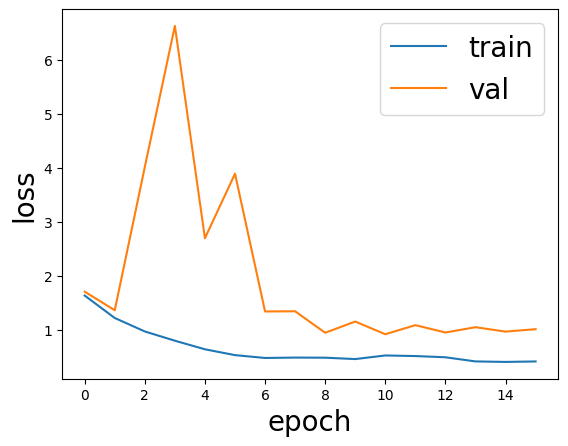

In [96]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()